In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import pylab 
import scipy.stats as stats
import datetime
%matplotlib inline

pd.set_option('display.max_columns', None)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



## 1.0 Dane 

In [ ]:
## wczytujemy plik do zmiennej titanic (bez ustawien - csv z DATA_TMP - train.csv)

In [4]:
titanic = pd.read_csv('DATA_TMP/train.csv')

In [ ]:
## kopiujemy titanic 

In [5]:
data1 = titanic.copy()

In [ ]:
## sprawdzmy procentowy udział dla każdej zmiennej wartości pustych przez insnull i mean na data1

In [6]:
data1.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
data1['Age'].mean()

29.69911764705882

In [12]:
data1[data1['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [15]:
data1[~data1['Age'].isnull()]['Age'].mean()

29.69911764705882

In [ ]:
data1['Age'].mean()

In [ ]:
## sprawdzmy ile obserwacji musimy wyrzucić
## 1 total passengers with values in all variables
## 2 total passengers in the Titanic:
## 3 percentage of data without missing values
## wyprintuj

In [12]:
print('total passengers with values in all variables: ', data1.dropna().shape[0])
print('total passengers in the Titanic: ', data1.shape[0])
print('percentage of data without missing values: ', data1.dropna().shape[0]/ float(data1.shape[0]))

total passengers with values in all variables:  183
total passengers in the Titanic:  891
percentage of data without missing values:  0.2053872053872054


 ## 2.0 Mean / Median / Mode Imputation

In [ ]:
## skopiujmy titanic do data2

In [18]:
data2 = titanic.copy()

In [19]:
## sprawdzmy udział procentowy NA w datasecie data2

In [20]:
data2.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
## Imputację należy przeprowadzić na zbiorze uczącym,
# a następnie propagować na zbiorze testowym. 
# Oznacza to, że średnia/mediana, która ma zostać użyta do uzupełnienia 
# brakujących wartości zarówno w pociągu, jak iw zbiorze testowym, 
# powinna zostać wyodrębniona tylko z zestawu pociągów. A to ma na celu uniknięcie przetrenowania.

In [21]:
## wyśietl wykres dystrybucji dla wieku - tego będziemy sie uczyć na następnych zajęciach

Text(0.5, 0, 'Age')

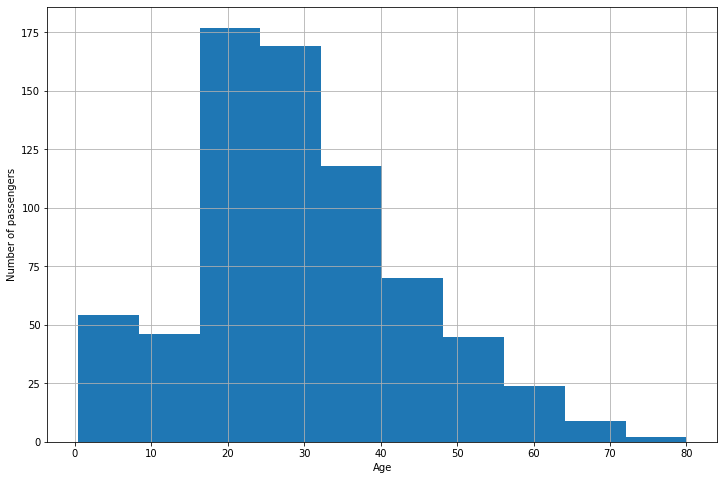

In [23]:
plt.figure(figsize=(12,8))
fig = data2.Age.hist(bins=10)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

In [24]:
## musimy podzielić zbiór dla treningowy i testowy 
## do tego użyjemy train_test_split - będziecie sie o tym uczyć dalej - póki co trzeba wiedzieć że trzeba go podzielić
## i że uczymy na zbiorze treningowym - a testowym sie sprawdzamy
## oraz ze możemy udzielić współczynnik podziału test_size = 0.3

In [25]:
# separate dataset into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data2, data2.Survived, test_size=0.3, 
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [26]:
## wylicz mediane dla kolumny Age i przypisz do zmiennej median

In [27]:
median = X_train.Age.median()
median

In [28]:
## zrób pętle for dla obu zbiorów
## gdzie kolumna Age wypełni dla nanów mediana


In [29]:
for df in [X_train, X_test]:
    df['Age'].fillna(median, inplace=True)

In [30]:
## sprawdź dla zbioru treningowego ile jest nanow w kolumne Age

In [31]:
X_train['Age'].isnull().sum()

0

In [32]:
X_test['Age'].isnull().sum()

0

In [33]:
## jakie sa jeszcze sposoby wypełniania?
## Notebook A reference guide to feature engiereeing methods

## 3.0 Categorical Encoding

## 3.1 One-Hot Encoding OHE 

In [36]:
# OHE to standardowe podejście do kodowania danych kategorycznych.
# Jedno kodowanie na gorąco (OHE) tworzy zmienną binarną dla każdej z różnych kategorii obecnych w zmiennej. 
# Te zmienne binarne przyjmują 1, jeśli obserwacja pokazuje określoną kategorię lub 0 w przeciwnym razie. 
# OHE nadaje się do modeli liniowych. 
# Ale OHE znacznie rozszerza przestrzeń cech, jeśli zmienne kategorialne są wysoce kardynalne lub 
# jeśli istnieje wiele zmiennych kategorialnych. Ponadto wiele pochodnych zmiennych fikcyjnych może być wysoce skorelowanych.


In [37]:
## kopiujemy titanic do data7

In [38]:
data7 = titanic.copy()

In [39]:
## pokazujemy 5 pierwszych wierszy z kolumny Sex

In [41]:
data7['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [42]:
## wykonujemy za pomoca get_dummies dla tych 5 wierszy pokazowa tabele jak wyglada one hot encoding

In [45]:
pd.get_dummies(data7['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [82]:
## za pomoca pd.concat możemy połaczyć ta powyższe polecenie z get_dummies z data7['Sex'] - dodajmy na końcu .head()

In [47]:
pd.concat([data7['Sex'], pd.get_dummies(data7['Sex'])], axis=1).head()

,Sex,female,male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


In [ ]:
# Widzimy, że potrzebujemy tylko 1 z 2 zmiennych fikcyjnych, aby reprezentować pierwotną zmienną kategoryczną Płeć. 
# Każdy z 2 wykona zadanie i nie ma znaczenia, który wybierzemy, ponieważ są one równoważne. 
# Dlatego, aby zakodować zmienną kategorialną z 2 etykietami, potrzebujemy tylko 1 zmiennej fikcyjnej.
# Pokażmy tylko kolumne male za pomoca funkcji get_dummies

In [83]:
pd.get_dummies(data7['Sex'], drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
## a co by było przy multi kategoriach ? 

In [ ]:
# pokażmy 5 pierwszych wierszy dla head

In [48]:
data7['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [50]:
## sprawdźmy ile jest unikatowych wartości w Embarked

In [51]:
data7.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [52]:
## znowu użyjmy pd.get_dummies dla kolumny Embarked i dla 5 wierszy 

In [55]:
pd.get_dummies(data7['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
## kolumna Q jest chyba nie potrzebna w tym przypadku skoro sa same zera?

In [54]:
pd.get_dummies(data7['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


## 5. Variable Transformation


In [59]:
## za pomoca funkcji imput_na w tym random state wypełniemy dane


In [60]:
## wczytajmy dane z csv dla kolumn Age Fare Survived uzywajac atrybutu usecols

In [62]:
data = pd.read_csv('DATA_TMP/train.csv', usecols = ['Age', 'Fare', 'Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [63]:
def impute_na(data, variable):
    # function to fill na with a random sample
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [66]:
data['Age'] = impute_na(data, 'Age')

In [ ]:
## Możemy zwizualizować rozkład zmiennej Wiek, wykreślając histogram i wykres Q-Q.
## wykonajmy funkcje 

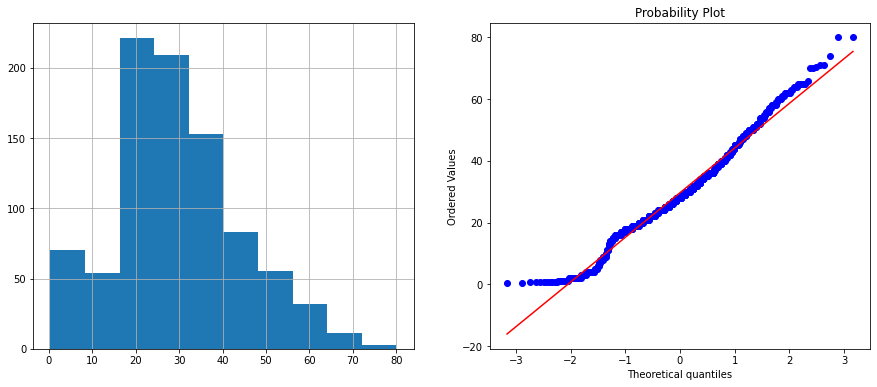

In [65]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    
diagnostic_plots(data, 'Age')

In [67]:
## Funkcja logarytmiczna

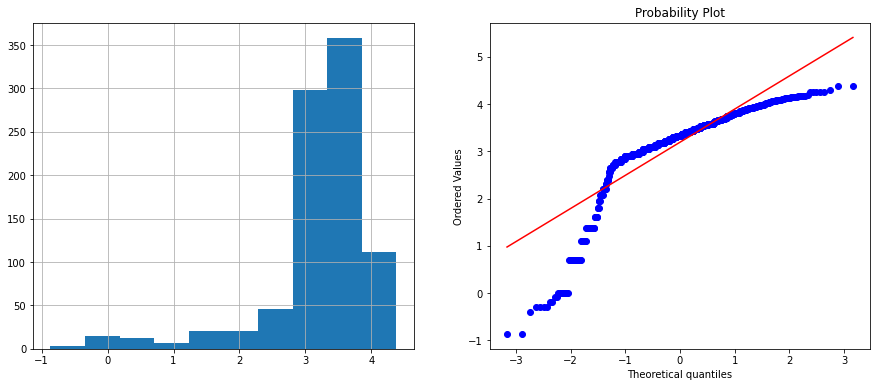

In [68]:
### Logarithmic transformation
data['Age_log'] = np.log(data.Age)

diagnostic_plots(data, 'Age_log')

In [ ]:
## 5.2 Reciprocal transformation 

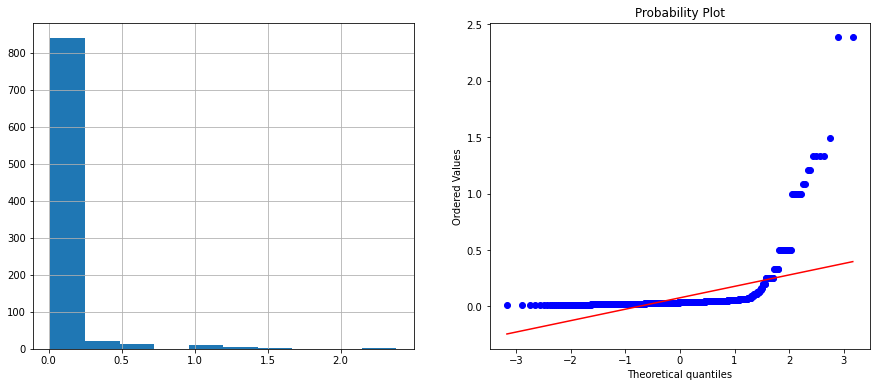

In [69]:
### Reciprocal transformation
data['Age_reciprocal'] = 1 / data.Age

diagnostic_plots(data, 'Age_reciprocal')

In [70]:
## 5.3 Square root transformation 

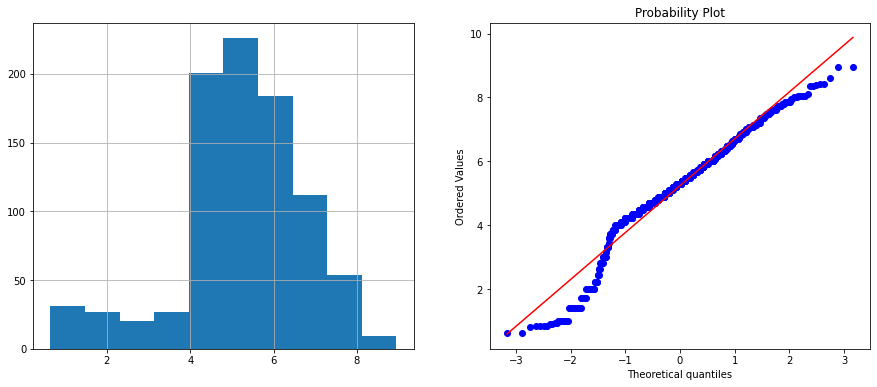

In [72]:
data['Age_sqr'] =data.Age**(1/2)

diagnostic_plots(data, 'Age_sqr')

## 5.5 BoxCox transformation

Optimal λ:  0.7648522386984838


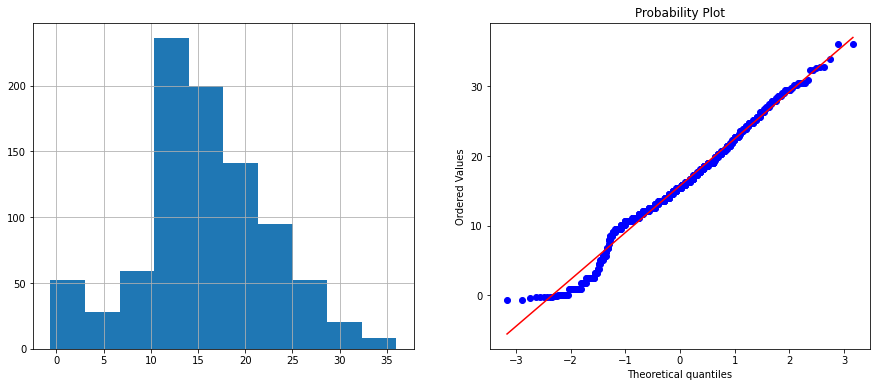

In [74]:
data['Age_boxcox'], param = stats.boxcox(data.Age) 

print('Optimal λ: ', param)

diagnostic_plots(data, 'Age_boxcox')

## 6. Dyskretytacja

In [75]:
# Polecenie cut tworzy równe przedziały, ale częstotliwość próbek jest nierówna w każdym przedziale.

# Komenda qcut tworzy pojemniki o różnych rozmiarach, ale częstotliwość próbek jest taka sama w każdym pojemniku.

![Discretising data with pandas cut and qcut](https://i.stack.imgur.com/pObHa.png)

In [77]:
x = np.array([24,  7,  2, 25, 22, 29])
x   

array([24,  7,  2, 25, 22, 29])

In [78]:
# equal width discretisation with cut 
pd.cut(x, bins = 3, labels = ["bad", "medium", "good"]).value_counts() #Bins size has equal interval of 9   

bad       2
medium    0
good      4
dtype: int64

In [79]:
# define x
x = np.array([24,  7,  2, 25, 22, 29])
x    

array([24,  7,  2, 25, 22, 29])

In [80]:
# equal frequency discretisation with qcut 
pd.qcut(x, q = 3, labels = ["bad", "medium", "good"]).value_counts() #Equal frequency of 2 in each bins

bad       2
medium    2
good      2
dtype: int64

## 7. Outlier Engineering 

In [ ]:
# Identyfikacja wartości odstających
# Analiza wartości ekstremalnych

#     Najbardziej podstawową formą wykrywania wartości odstających jest analiza wartości ekstremalnych 
# danych jednowymiarowych. Kluczem do tej metody jest określenie ogonów statystycznych podstawowego rozkładu zmiennej,
# a następnie znalezienie wartości, które znajdują się na samym końcu ogonów.

#     W typowym scenariuszu rozkład zmiennej jest rozkładem gaussowskim, a zatem wartości odstające będą 
# leżeć poza średnią plus minus 3-krotność odchylenia standardowego zmiennej.

#     Jeśli zmienna nie ma rozkładu normalnego, ogólne podejście polega na obliczeniu kwantyli, 
# a następnie rozstępu międzykwantylowego (IQR), w następujący sposób:

#     IQR = 75-ty kwantyl - 25-ty kwantyl

#     Wartość odstająca będzie znajdować się poza następującymi górnymi i dolnymi granicami:

#     Górna granica = 75. kwantyl + (IQR * 1,5)

#     Dolna granica = 25. kwantyl - (IQR * 1,5)

# lub w skrajnych przypadkach:

#     Górna granica = 75. kwantyl + (IQR * 3)

#     Dolna granica = 25. kwantyl - (IQR * 3)

In [84]:
## wczytajmy train.csv z kolumnami 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'
## pokażmy 5 pierwszych wierszy

In [ ]:
# load the numerical variables of the Titanic Dataset
data = pd.read_csv('/kaggle/input/titanic/train.csv', usecols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'])
data.head()

In [85]:
## wykonajmy podział danych na treningowe i testowe jak wyżej w proporcji test = 0.3
## wyswietl shapy obu zbiorow

In [86]:
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 7), (268, 7))

In [87]:
## zwizualizujmy Age and Fare

Text(0, 0.5, 'Fare')

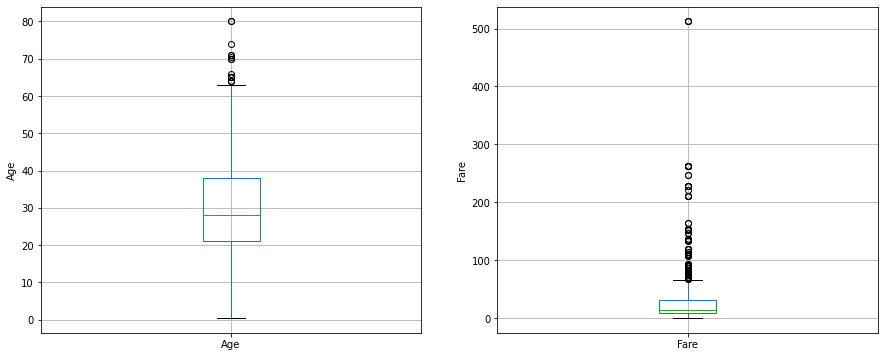

In [88]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(1, 2, 2)
fig = data.boxplot(column='Fare')
fig.set_title('')
fig.set_ylabel('Fare')

![Discretising data with pandas cut and qcut](https://www.statystyka-zadania.pl/wp-content/uploads/2018/02/wykres-pude%C5%82kowy2-1.png)


In [90]:
## zobaczmy dystrybucje

Text(0.5, 0, 'Fare')

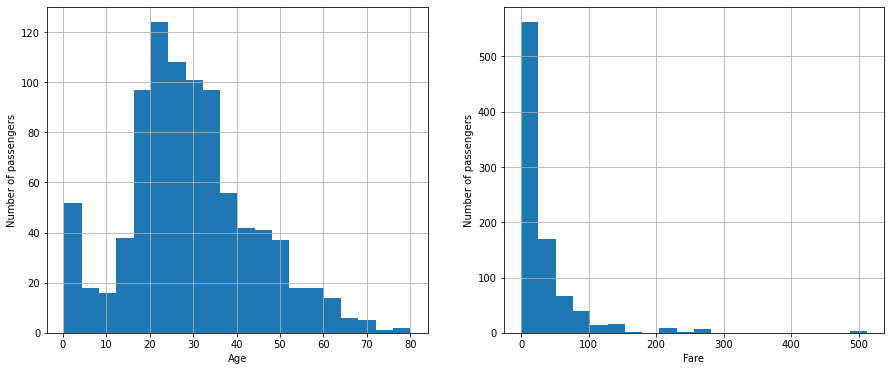

In [91]:

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.Age.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

plt.subplot(1, 2, 2)
fig = data.Fare.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare')

In [92]:
## znajdowanie outlierow

In [93]:


# find outliers

# Age
Upper_boundary = data.Age.mean() + 3* data.Age.std()
Lower_boundary = data.Age.mean() - 3* data.Age.std()
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

# Fare
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
Lower_fence = data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))



Age outliers are values < -13.990614345024813 or > 73.39131019238734
Fare outliers are values < -61.358399999999996 or > 100.2688


In [95]:
data.Age.mean()

29.70034792368126

In [97]:
3* data.Age.std()

43.69096226870607

In [98]:
## wykonaj describe dla kolumny Age

In [99]:
data.Age.describe()

count    891.000000
mean      29.700348
std       14.563654
min        0.420000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [100]:
## zmień dla X_train i X_test wartości dla kolumny Age powyżej 73 na  =73 

In [102]:
X_train.loc[X_train.Age>73, 'Age'] = 73
X_test.loc[X_test.Age>73, 'Age'] = 73



In [ ]:
## pokaż dla obu zbiorów dla kolumny Age max

In [ ]:
X_train.Age.max(), X_test.Age.max()